In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.3 MB/s 


In [2]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv.zip'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv.zip
   creating: data_team_cv/
   creating: data_team_cv/train/
   creating: data_team_cv/train/anh/
  inflating: data_team_cv/train/anh/17.jpg  
  inflating: data_team_cv/train/anh/20.jpg  
  inflating: data_team_cv/train/anh/28.jpg  
  inflating: data_team_cv/train/anh/21.jpg  
  inflating: data_team_cv/train/anh/24.jpg  
  inflating: data_team_cv/train/anh/27.jpg  
  inflating: data_team_cv/train/anh/18.jpg  
  inflating: data_team_cv/train/anh/16.jpg  
  inflating: data_team_cv/train/anh/9.jpg  
  inflating: data_team_cv/train/anh/11.jpg  
  inflating: data_team_cv/train/anh/26.jpg  
  inflating: data_team_cv/train/anh/23.jpg  
  inflating: data_team_cv/train/anh/22.jpg  
  inflating: data_team_cv/train/anh/29.jpg  
  inflating: data_team_cv/train/anh/32.jpg  
  inflating: data_team_cv/train/anh/25.jpg  
  inflating: data_team_cv/train/anh/31.jpg  
  inflating: data_team_cv/train/anh/30.jpg  
  inflating: data_t

In [ ]:
from os import listdir
from os.path import isdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from numpy import savez_compressed

In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
# load image from file
  image = Image.open(filename)
# convert to RGB, if needed
  image = image.convert( 'RGB')
# convert to array
  pixels = asarray(image)
# create the detector, using default weights
  detector = MTCNN()
# detect faces in the image
  results = detector.detect_faces(pixels)
# extract the bounding box from the first face
  if results != []:
    x1, y1, width, height = results[0]['box']
# bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
# extract the face
    face = pixels[y1:y2, x1:x2]
# resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
  else:
    return []
# load the photo and extract the face
# pixels = extract_face()

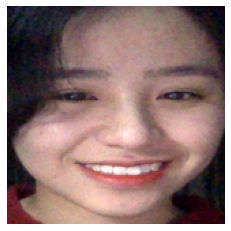

In [ ]:
face = extract_face('/content/data_team_cv/train/hoai/12.jpg')
pyplot.axis('off')
pyplot.imshow(face)
pyplot.show()

In [ ]:
def load_faces(directory):
  faces = list()
# enumerate files
  for filename in listdir(directory):
# path
    path = directory + filename
    print(path)
# get face
    face = extract_face(path)
# store
    if face != [] :
      faces.append(face)
  return faces

In [ ]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
  X, y = list(), list()
# enumerate folders, on per class
  for subdir in listdir(directory):
# path
    path = directory + subdir + '/'
    print(path)
# skip any files that might be in the dir
    if not isdir(path):
      continue
# load all faces in the subdirectory
    faces = load_faces(path)
# create labels
    labels = [subdir for _ in range(len(faces))]
# summarize progress
    print( '>loaded %d examples for class: %s' % (len(faces), subdir))
# store
    X.extend(faces)
    y.extend(labels)
  return asarray(X), asarray(y)

In [ ]:
# load train dataset
trainX, trainy = load_dataset( '/content/data_team_cv/train/' )
print(trainX.shape, trainy.shape)

/content/data_team_cv/train/anh/
/content/data_team_cv/train/anh/27.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/content/data_team_cv/train/anh/19.jpg
/content/data_team_cv/train/anh/7.jpg
/content/data_team_cv/train/anh/22.jpg
/content/data_team_cv/train/anh/23.jpg
/content/data_team_cv/train/anh/5.jpg
/content/data_team_cv/train/anh/25.jpg
/content/data_team_cv/train/anh/9.jpg
/content/data_team_cv/train/anh/18.jpg
/content/data_team_cv/train/anh/13.jpg
/content/data_team_cv/train/anh/29.jpg
/content/data_team_cv/train/anh/32.jpg
/content/data_team_cv/train/anh/3.jpg
/content/data_team_cv/train/anh/6.jpg
/content/data_team_cv/train/anh/12.jpg
/content/data_team_cv/train/anh/2.jpg
/content/data_team_cv/train/anh/26.jpg
/content/data_team_cv/train/anh/30.jpg
/content/data_team_cv/train/anh/24.jpg
/content/data_team_cv/train/anh/17.jpg
/content/data_team_cv/train/anh/1.jpg
/content/data_team_cv/train/anh/20.jpg
/content/data_team_cv/train/anh/15.jpg
/content/data_team_cv/train/anh/11.jpg
/content/data_team_cv/train/anh/8.jpg
/content/data_team_cv/train/anh/16.jpg
/content/data_team_cv/train/anh/1

In [ ]:
# load test dataset
testX, testy = load_dataset( '/content/data_team_cv/test/' )
print(testX.shape, testy.shape)
print(testX.dtype)

/content/data_team_cv/test/anh/
/content/data_team_cv/test/anh/39.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


/content/data_team_cv/test/anh/36.jpg
/content/data_team_cv/test/anh/37.jpg
/content/data_team_cv/test/anh/33.jpg
/content/data_team_cv/test/anh/38.jpg
/content/data_team_cv/test/anh/40.jpg
/content/data_team_cv/test/anh/35.jpg
/content/data_team_cv/test/anh/34.jpg
>loaded 8 examples for class: anh
/content/data_team_cv/test/co/
/content/data_team_cv/test/co/39.jpg
/content/data_team_cv/test/co/36.jpg
/content/data_team_cv/test/co/37.jpg
/content/data_team_cv/test/co/33.jpg
/content/data_team_cv/test/co/38.jpg
/content/data_team_cv/test/co/40.jpg
/content/data_team_cv/test/co/35.jpg
/content/data_team_cv/test/co/34.jpg
>loaded 8 examples for class: co
/content/data_team_cv/test/duc/
/content/data_team_cv/test/duc/39.jpg
/content/data_team_cv/test/duc/36.jpg
/content/data_team_cv/test/duc/37.jpg
/content/data_team_cv/test/duc/33.jpg
/content/data_team_cv/test/duc/38.jpg
/content/data_team_cv/test/duc/40.jpg
/content/data_team_cv/test/duc/35.jpg
/content/data_team_cv/test/duc/34.jpg
>loa

In [ ]:
# save arrays to one file in compressed format
savez_compressed( '/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv.npz' , trainX, trainy, testX, testy)

In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model( '/content/gdrive/MyDrive/Colab Notebooks/facenet/facenet_keras.h5' )
# summarize input and output shape
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                

In [ ]:
from numpy import load
data = load('/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv.npz', allow_pickle=True)
trainX, trainy, testX, testy = data[ 'arr_0' ], data[ 'arr_1'], data[ 'arr_2'], data[ 'arr_3' ]
print( 'Loaded: ' , trainX.shape, trainy.shape, testX.shape, testy.shape)


Loaded:  (192, 160, 160, 3) (192,) (48, 160, 160, 3) (48,)


In [ ]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
# scale pixel values
  # print(face_pixels.shape)
  face_pixels = face_pixels.astype('float32')
# standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
# transform face into one sample
  samples = expand_dims(face_pixels, axis=0)
# make prediction to get embedding
  yhat = model.predict(samples)
  return yhat[0]

In [ ]:
from numpy import expand_dims
from numpy import asarray
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
  embedding = get_embedding(model, face_pixels)
  newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
print(trainy.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
  embedding = get_embedding(model, face_pixels)
  newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
print(testy.shape)
# save arrays to one file in compressed format
savez_compressed( '/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv_new.npz' , newTrainX, trainy, newTestX, testy)

(192, 128)
(192,)
(48, 128)
(48,)


In [ ]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load( '/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv_new.npz' )
trainX, trainy, testX, testy = data[ 'arr_0' ], data[ 'arr_1' ], data[ 'arr_2' ], data[ 'arr_3' ]
print( 'Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm= 'l2' )
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel= 'linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print( 'Accuracy: train=%.3f, test=%.3f'% (score_train*100, score_test*100))

Dataset: train=192, test=48
Accuracy: train=99.479, test=100.000


Predicted: giang(emHoai) (92.249)
Expected: giang(emHoai)


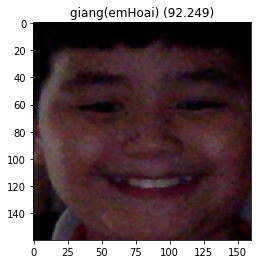

In [ ]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load( '/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load( '/content/gdrive/MyDrive/Colab Notebooks/facenet/data_team_cv_new.npz' )
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print( 'Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print( 'Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()